In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

# Study hours (X) and Marks (y)
X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
y = np.array([35, 40, 50, 60, 65, 70])


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)


In [37]:
print("GOOD FIT (Linear Regression)")
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R² :", r2_score(y_train, y_train_pred))


GOOD FIT (Linear Regression)
Train MSE: 1.875
Train R² : 0.9657142857142857


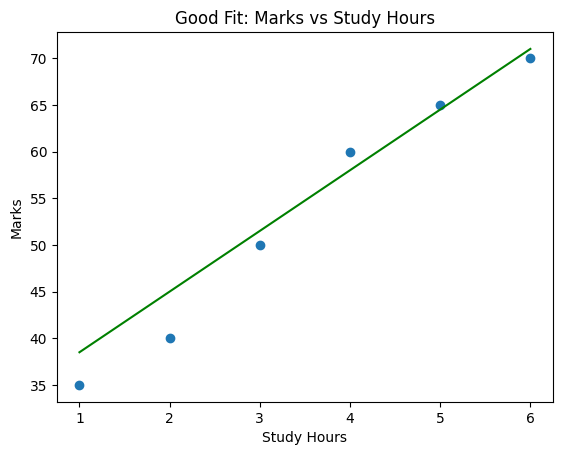

In [38]:
plt.scatter(X, y)
plt.plot(X, lin_reg.predict(X), color='green')
plt.title("Good Fit: Marks vs Study Hours")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.show()


In [39]:
poly = PolynomialFeatures(degree=5)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

overfit_model = LinearRegression()
overfit_model.fit(X_train_poly, y_train)

y_train_pred_poly = overfit_model.predict(X_train_poly)
y_test_pred_poly = overfit_model.predict(X_test_poly)


In [40]:
print("\nOVERFITTING MODEL (Polynomial Degree = 5)")
print("Train MSE:", mean_squared_error(y_train, y_train_pred_poly))
print("Train R² :", r2_score(y_train, y_train_pred_poly))




OVERFITTING MODEL (Polynomial Degree = 5)
Train MSE: 8.23880018525583e-24
Train R² : 1.0


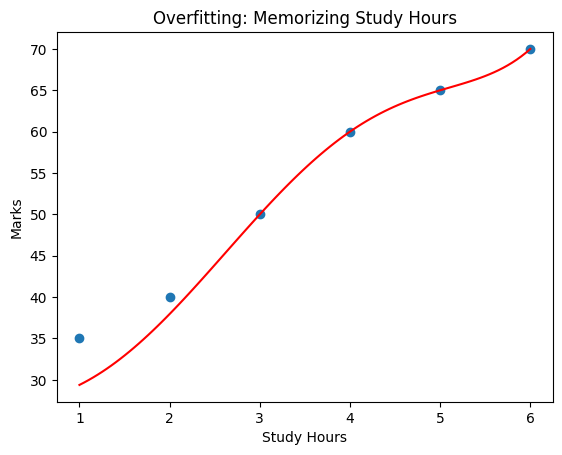

In [41]:
X_grid = np.linspace(1, 6, 100).reshape(-1, 1)
X_grid_poly = poly.transform(X_grid)

plt.scatter(X, y)
plt.plot(X_grid, overfit_model.predict(X_grid_poly), color='red')
plt.title("Overfitting: Memorizing Study Hours")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.show()


In [42]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)


In [43]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)
ridge.fit(X_poly, y)

y_ridge_pred = ridge.predict(X_poly)


In [44]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)
ridge.fit(X_poly, y)

y_ridge_pred = ridge.predict(X_poly)


In [45]:
from sklearn.metrics import mean_squared_error, r2_score

print("Ridge MSE:", mean_squared_error(y, y_ridge_pred))
print("Ridge R² :", r2_score(y, y_ridge_pred))



Ridge MSE: 0.24058058055628095
Ridge R² : 0.9985320506949108


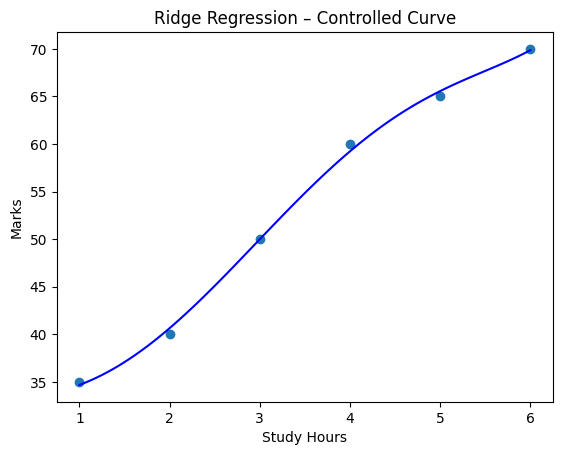

In [46]:
import matplotlib.pyplot as plt

X_grid = np.linspace(1, 6, 100).reshape(-1, 1)
X_grid_poly = poly.transform(X_grid)

plt.scatter(X, y)
plt.plot(X_grid, ridge.predict(X_grid_poly), color='blue')
plt.title("Ridge Regression – Controlled Curve")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.show()


In [47]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_poly, y)

y_lasso_pred = lasso.predict(X_poly)


c:\Users\jakku\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.580e+00, tolerance: 9.833e-02
  model = cd_fast.enet_coordinate_descent(


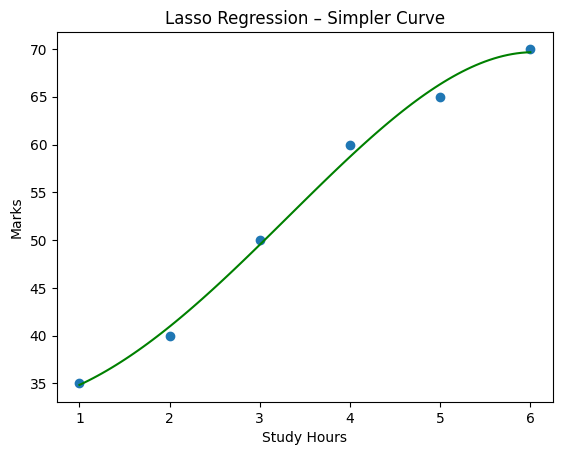

In [48]:
plt.scatter(X, y)
plt.plot(X_grid, lasso.predict(X_grid_poly), color='green')
plt.title("Lasso Regression – Simpler Curve")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.show()


In [49]:
from sklearn.metrics import mean_squared_error, r2_score

print("Ridge MSE:", mean_squared_error(y, y_ridge_pred))
print("Ridge R² :", r2_score(y, y_ridge_pred))

print("\nLasso MSE:", mean_squared_error(y, y_lasso_pred))
print("Lasso R² :", r2_score(y, y_lasso_pred))


Ridge MSE: 0.24058058055628095
Ridge R² : 0.9985320506949108

Lasso MSE: 0.7727384155729596
Lasso R² : 0.9952849859388768
